In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore")

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mpl
mpl.rcParams["axes.unicode_minus"] = False

# 서울시 공공 자전거 대여 분석

### 1. 데이터 준비

In [25]:
bike = pd.read_csv("data/SeoulBikeData.csv")
bike.head(10)

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


In [26]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(C)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

In [27]:
##### 시간대별로 평균 몇 대가 대여되었을까?
bike.groupby("Hour")["Rented Bike Count"].mean()

Hour
0      541.460274
1      426.183562
2      301.630137
3      203.331507
4      132.591781
5      139.082192
6      287.564384
7      606.005479
8     1015.701370
9      645.983562
10     527.821918
11     600.852055
12     699.441096
13     733.246575
14     758.824658
15     829.186301
16     930.621918
17    1138.509589
18    1502.926027
19    1195.147945
20    1068.964384
21    1031.449315
22     922.797260
23     671.126027
Name: Rented Bike Count, dtype: float64

Text(16, 100, '퇴근')

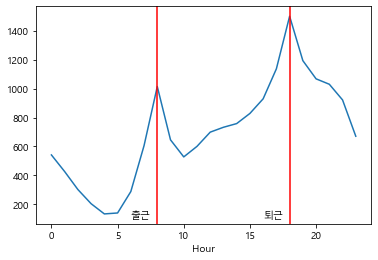

In [53]:
##### 시각화
bike.groupby("Hour")["Rented Bike Count"].mean().plot()

plt.axvline(x=8, color="r")
plt.axvline(x=18, color="r")
plt.text(6, 100, "출근")
plt.text(16, 100, "퇴근")

In [39]:
##### 2016년 1월 1일은 금요일이었다. Date변수에서 요일을 뽑아서 파생변수 만들기

bike.loc[:, "Date"] = pd.to_datetime(bike["Date"], format="%d/%m/%Y")
# bike.info()
diff = (bike["Date"] - pd.to_datetime('2016-01-01')).astype(str)

diff_num = diff.str.split(" ", expand=True)[0].astype(int)
diff_num

def weekdays(x):
    if x%7 == 0:
        return "금요일"
    elif x%7 == 1:
        return "토요일"
    elif x%7 == 2:
        return "일요일"
    elif x%7 == 3:
        return "월요일"
    elif x%7 == 4:
        return "화요일"
    elif x%7 == 5:
        return "수요일"
    elif x%7 == 6:
        return "목요일"
    
bike["weekdays"] = diff_num.apply(weekdays)
bike["weekdays"]

0       금요일
1       금요일
2       금요일
3       금요일
4       금요일
       ... 
8755    금요일
8756    금요일
8757    금요일
8758    금요일
8759    금요일
Name: weekdays, Length: 8760, dtype: object

In [45]:
# 조금 더 간단한 방법
bike["weekdays2"] = ((pd.to_datetime(bike["Date"],format="%d/%m/%Y") - pd.to_datetime('2016-01-01')).dt.days)%7

bike["weekdays2"] = bike["weekdays2"].map({0:"금요일", 1:"토요일", 2:"일요일", 3:"월요일", 4:"화요일", 5:"수요일", 6:"목요일"})
bike.head(10)

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,weekdays,weekdays2
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,금요일,금요일
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,금요일,금요일
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes,금요일,금요일
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,금요일,금요일
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes,금요일,금요일
5,2017-12-01,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes,금요일,금요일
6,2017-12-01,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes,금요일,금요일
7,2017-12-01,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes,금요일,금요일
8,2017-12-01,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes,금요일,금요일
9,2017-12-01,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes,금요일,금요일


<AxesSubplot:xlabel='weekdays', ylabel='Rented Bike Count'>

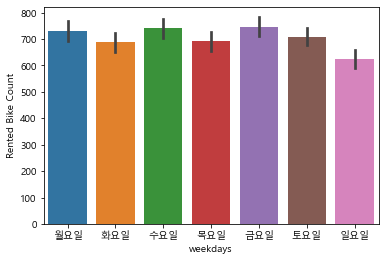

In [60]:
##### 요일별로 평균 몇 대가 대여되었을까?

bike.groupby("weekdays")["Rented Bike Count"].mean()

##### 막대 그래프로 비교 시각화
sns.barplot(x="weekdays",y="Rented Bike Count", data=bike, 
            order=["월요일","화요일","수요일","목요일","금요일","토요일","일요일"])

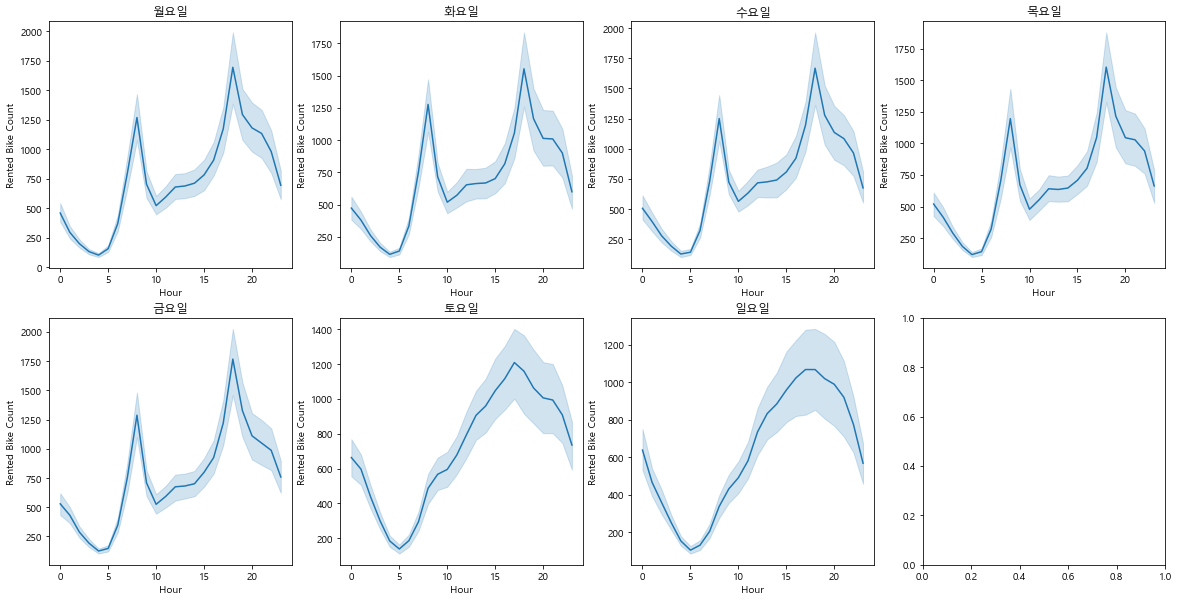

In [62]:
##### 요일별로 시간대별 그래프로 시각화

# f = 그래프에 대한 정보 , ax = 0~7번째 그래프 
f, ax = plt.subplots(2, 4, figsize=(20, 10))

weekdays_list = ["월요일","화요일","수요일","목요일","금요일","토요일","일요일"]

for i in range(7):
    sns.lineplot("Hour", "Rented Bike Count", data=bike.loc[bike["weekdays"] == weekdays_list[i]],
                ax = ax[i//4, i%4]) # ax = (0,0) ~ (1,3)

    ax[i//4, i%4].set_title(weekdays_list[i])